In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan_df = pd.read_csv("/Users/yasaswi/Documents/marlabs/training/datasets/Loan_Default.csv")

In [3]:
loan_df["income"] = loan_df["income"].fillna(loan_df["income"].mean())
loan_df["loan_amount"] = loan_df["loan_amount"].fillna(loan_df["loan_amount"].mean())
loan_df["rate_of_interest"] = loan_df["rate_of_interest"].fillna(loan_df["rate_of_interest"].mean())
loan_df["approv_in_adv"] = loan_df["approv_in_adv"].fillna(loan_df["approv_in_adv"].mode())



loan_df = loan_df.assign(
total_units = loan_df["total_units"].map({
"1U": "1U",
"2U": "2U+",
"3U": "2U+",
"4U": "2U+"}),
loan_amt_v_income = loan_df["loan_amount"]/loan_df["income"]
)

loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,loan_amt_v_income
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,66.954023
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,41.465863
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,42.879747
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,38.425926
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,66.714559


In [4]:
prep_loan_df = loan_df.drop([
 "year", 
 "ID", 
 "open_credit", 
 "construction_type", 
 "Security_Type", 
 "Secured_by"], 
 axis=1
 )

In [5]:
from sklearn.model_selection import train_test_split

features = [
"loan_amount", 
"income", 
"Gender",
"rate_of_interest",
"age",
"lump_sum_payment",
"credit_type",
"total_units",
"Credit_Worthiness",
"Credit_Score",
"approv_in_adv", 

]

X = pd.get_dummies(prep_loan_df[features], drop_first=True)
y = prep_loan_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)
from sklearn.linear_model import LogisticRegression

In [6]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
accuracy_score(y_test, lr.predict(X_test))
f1_score(y_test, lr.predict(X_test))

0.5887210284320165

In [8]:
f1_score(y_test, lr.predict(X_test))

0.5887210284320165

In [9]:
lr.predict_proba(X_test)

array([[0.74949606, 0.25050394],
       [0.91218419, 0.08781581],
       [0.7267983 , 0.2732017 ],
       ...,
       [0.8631777 , 0.1368223 ],
       [0.75648674, 0.24351326],
       [0.22306041, 0.77693959]])

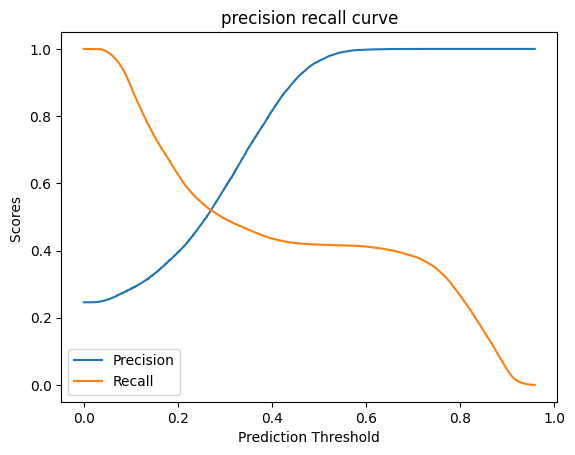

In [10]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])

plt.plot(t_curve, p_curve[:-1], label="Precision")
plt.plot(t_curve, r_curve[:-1], label="Recall")
plt.xlabel("Prediction Threshold")
plt.ylabel("Scores ")
plt.legend()
plt.title("precision recall curve")
plt.show()

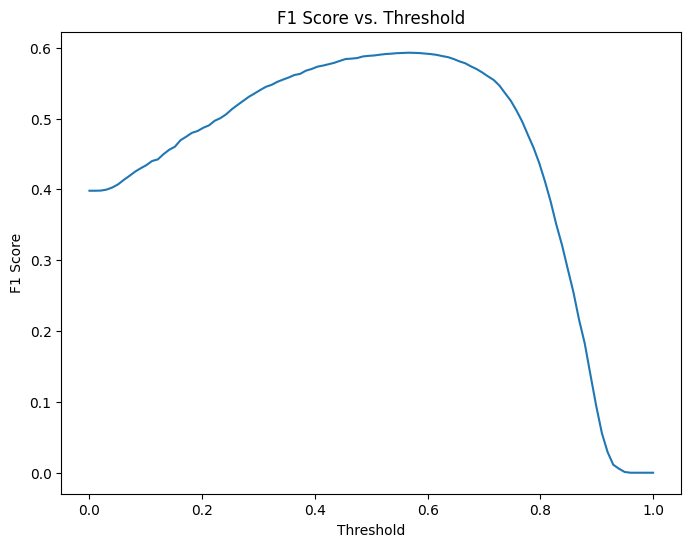

In [12]:
y_probs = lr.predict_proba(X_test)[:,1]
thresholds = np. linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_probs >= threshold)) for threshold in thresholds]
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel( 'Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold') 
plt.show()